# HRO for the Band D 

## For All

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

import numpy as np
from matplotlib.colors import SymLogNorm, LogNorm
from astropy.coordinates import SkyCoord
from scipy import ndimage
#from HAWCplot import HAWC_footprint
#from IPython.display import display, Math, Latex #For Latex math symbols

import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

file1 = './current_fits/F0450_HA_POL_unk5_HAWDHWPD_PMP_043-118.fits'

%matplotlib notebook

Extracting data from Band D

In [2]:
polfile=fits.open(file1)
w2=wcs.WCS(polfile[0].header)
xpix=polfile[0].header['NAXIS1']
ypix=polfile[0].header['NAXIS2']
data1 = polfile[0].data
polvec = polfile[11].data
rotate = True

Finding the gradient and angle for HRO

## HRO for Band D with modified range and rotated vectors

<IPython.core.display.Javascript object>


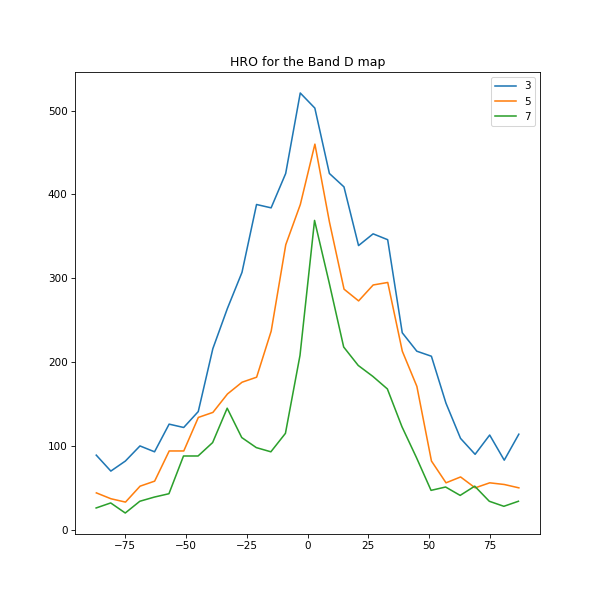

In [3]:
plt.figure(figsize=(8,8))

for i in np.arange(3, 8, 2):  # sets kernel size to calculate gradient
    deriv_0 = ndimage.gaussian_filter1d(data1,i,axis=0,order=1)  # along x-axis
    deriv_1 = ndimage.gaussian_filter1d(data1,i,axis=1,order=1)  # along y-axis
    grad = np.sqrt(deriv_0**2 + deriv_1**2)  # magnitude of gradient
    angle = np.arctan2(deriv_0,deriv_1)  # angle of the gradient
    angle = angle*(180./np.pi)  
    dphi = polvec - angle  # relative angle
    dphi = dphi.flatten()
    grad = grad.flatten()
    m = np.where(np.isnan(dphi) == False)   # mask to take care of the nans
    dphi = dphi[m]
    grad = grad[m]
    
    # to set the range of the angle between -90 and 90
    dphi[np.where(dphi < -90)] += 180
    dphi[np.where(dphi > 90)] -= 180
    
    # to rotate the vector by 90 so that the 0 corresponds to magnetic field aligned with filament. 
    if rotate is True:
        dphi += 90
        dphi[np.where(dphi > 90)] -= 180
   
    hist, bins = np.histogram(dphi,bins=30)#, weights = grad)  # for plotting histogram
    center = (bins[:-1] + bins[1:]) / 2  # calculating the central value 
    hist = plt.plot(center,hist,label=str(i))
plt.legend()
plt.title("HRO for the Band D map")
#plt.savefig("All_vetors_bandD_stage4.pdf")
plt.show()

## Band D intesnity bins and corresponding HRO's 

## HRO with Log Scale

<IPython.core.display.Javascript object>


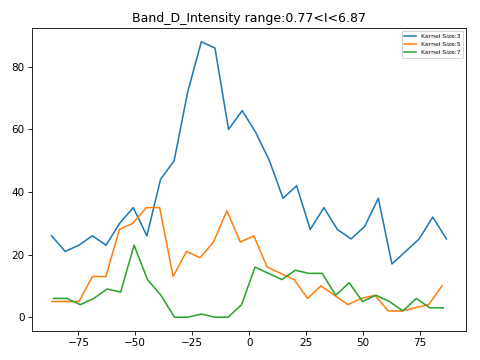

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


<IPython.core.display.Javascript object>


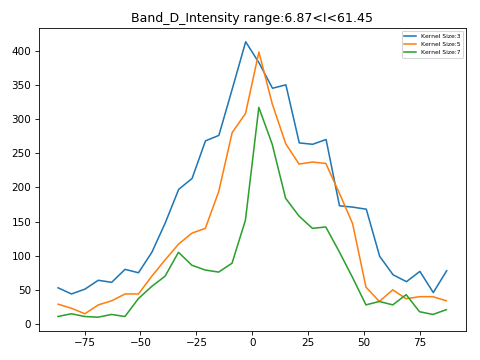

<IPython.core.display.Javascript object>


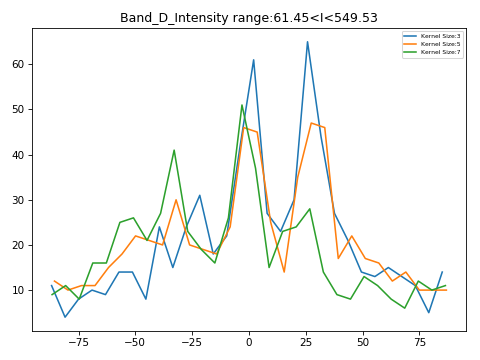

In [4]:
data1 = polfile[0].data
data3 = data1.copy()

log_spaced = np.logspace(np.log10(np.nanmin(data1)), np.log10(np.nanmax(data1)), 4)


#plt.figure()
for i in range(len(log_spaced)-1):
    plt.figure()
    m1 = np.where((data3 >= log_spaced[i]) & (data3 <= log_spaced[i+1]))
    
    for j in np.arange(3, 8, 2):  # for changing the kernel
        polang1 = polfile[11].data
        deriv_0 = ndimage.gaussian_filter1d(data3,j,axis=0,order=1)
        deriv_1 = ndimage.gaussian_filter1d(data3,j,axis=1,order=1)
        grad = np.sqrt(deriv_0**2 + deriv_1**2)
        angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
        angle = angle[m1]
        grad = grad[m1]
        #print(len(grad))
        #polang1 = polang1[m1]
        polang1 = polang1[m1]
        dphi = polang1 - angle
        #dphi = dphi.flatten()
        #grad = grad.flatten()
        # print(dphi.shape, grad.shape)

        m2 = np.where(np.isnan(dphi) == False)
        dphi = dphi[m2]
        grad = grad[m2]
         # to set the range of the angle between -90 and 90
        dphi[np.where(dphi < -90)] += 180
        dphi[np.where(dphi > 90)] -= 180
    
    # to rotate the vector by 90 so that the 0 corresponds to magnetic field aligned with filament. 
        if rotate is True:
            dphi += 90
            dphi[np.where(dphi > 90)] -= 180
        
 #       print(dphi.shape, grad.shape)
        hist1, bins1 = np.histogram(dphi, bins = 30)#, weights = grad)
        center1 = (bins1[:-1] + bins1[1:]) / 2
        plt.plot(center1,hist1, label = "Kernel Size:" + str(j))
        plt.legend(fontsize = "xx-small")
        #print(len(dphi))
        plt.show()
        #plt.title("Center")
    
    plt.title("Band_D_Intensity range:" +
              str('{0:.2f}'.format(log_spaced[i])) +
              "<" + "I" + "<" + str('{0:.2f}'.format(log_spaced[i+1])))
    plt.show()
    plt.tight_layout()
    plt.savefig("band_DIntensity_bins_stage5_" + str('{0:.2f}'.format(log_spaced[i+1])) + ".pdf")

In [5]:
log_spaced = np.logspace(np.log10(np.nanmin(data1)), np.log10(np.nanmax(data1)), 5)

In [6]:
sample_data = np.where(data1 <= 3.97 )

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


In [7]:
len(sample_data[0])

1458

## HRO for the BNKL region

In [8]:
from matplotlib.path import Path

nx, ny = 142, 158
poly_verts_center = [(071.72, 118.53), (074.01, 109.08), (073.73, 099.93), 
                     (075.44, 091.62), (079.74, 084.18), (080.31, 074.16), 
                     (082.03, 065.00), (089.47, 065.00), (089.18, 076.16), 
                     (090.62, 087.90), (088.61, 102.22), (083.74, 110.52),
                     (079.45, 120.82), (076.87, 126.55), (071.72, 118.53)]
poly_verts_bar = [(27.63, 61.23), (33.36, 54.36), (39.94, 50.64),
                  (50.82, 44.05), (52.25, 46.63), (39.94, 59.22),
                  (32.50, 62.95),(27.63, 61.23)]
poly_verts_other = [(41.00, 69.00), (57.00, 69.00), (57.00, 91.00),
                   (41.00, 91.00), (41.00, 69.00)]

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

#path = Path(poly_verts)
#grid = path.contains_points(points)
#grid = grid.reshape((ny,nx))

#print (grid)
#grid.shape

<IPython.core.display.Javascript object>


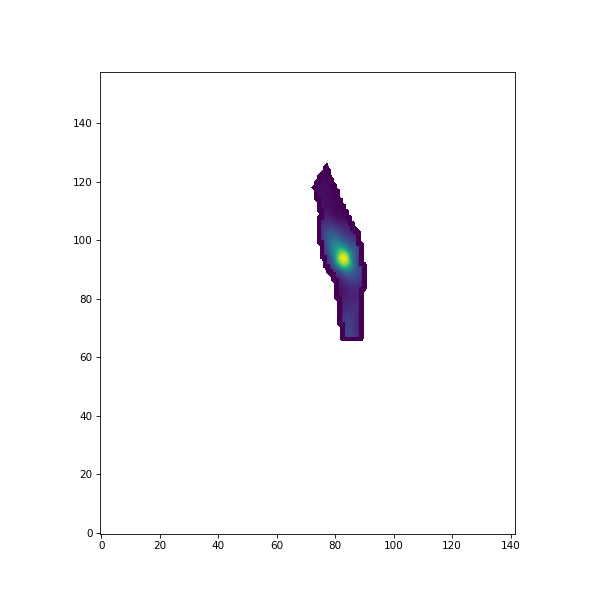

In [9]:
path_center = Path(poly_verts_center)
grid_center = path_center.contains_points(points)
grid_center = grid_center.reshape((ny,nx))
data_center = data1.copy()
data_center = data_center*grid_center
#polang_center = polfile[11].data*grid_center
plt.figure(figsize=(8,8))
data_center[np.where(data_center == 0)] = np.nan
plt.imshow(data_center, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
m = np.where(data1 == data_center)
plt.show()
#print(m)
#print(polang_center.shape)
#data_center[np.where(data_center ==0)] = np.nan

<IPython.core.display.Javascript object>


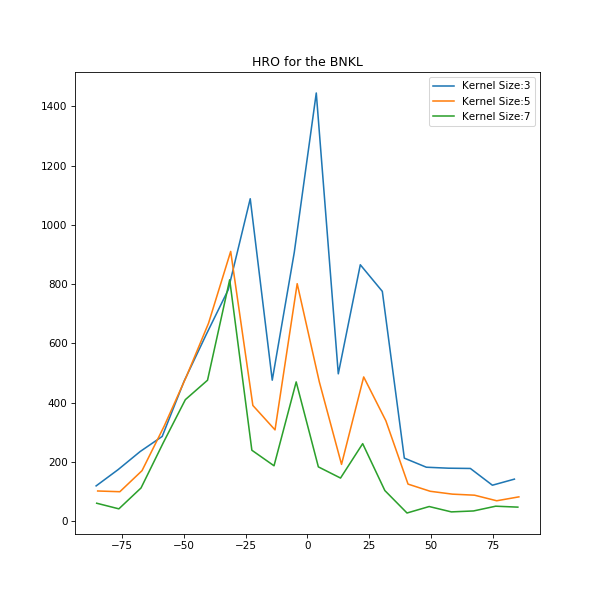

In [10]:
plt.figure(figsize = (8, 8))
for i in np.arange(3, 8, 2):
    deriv_0 = ndimage.gaussian_filter1d(data1,i,axis=0,order=1)
    deriv_1 = ndimage.gaussian_filter1d(data1,i,axis=1,order=1)
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    #print(np.nanmin(grad), np.nanmax(grad))
    angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
    angle = angle[m]
    grad = grad[m]
    polang1 = polfile[11].data
    polang1 = polang1[m]
    
    dphi = polang1 - angle
    
    #dphi = dphi.flatten()
    #grad = grad.flatten()
    #print(dphi.shape, grad.shape)
    m2 = np.where(np.isnan(dphi) == False)
    dphi = dphi[m2]
    grad = grad[m2]
    
    dphi[np.where(dphi < -90)] += 180
    dphi[np.where(dphi > 90)] -= 180
    
    # to rotate the vector by 90 so that the 0 corresponds to magnetic field aligned with filament. 
    if rotate is True:
        dphi += 90
        dphi[np.where(dphi > 90)] -= 180
    
    hist, bins = np.histogram(dphi, bins = 20, weights = grad)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(center,hist, label = "Kernel Size:" + str(i))
    plt.legend()
    plt.title("HRO for the BNKL")
    plt.show()
plt.savefig("BNKL_mask_stage3.pdf")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in less_equal


<IPython.core.display.Javascript object>


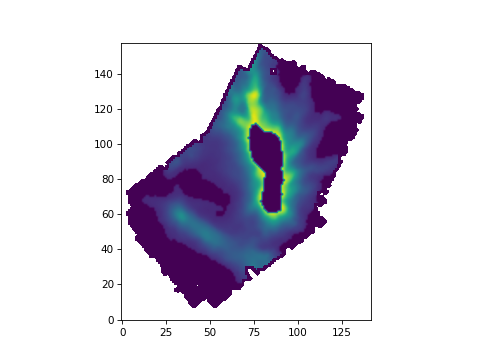

In [11]:
data1 = polfile[0].data
#data3 = data1.copy()

log_spaced = np.logspace(np.log10(np.nanmin(data1)), np.log10(np.nanmax(data1)), 4)

grid = data1.copy()
grid[np.where((data3 >= log_spaced[1]) & (data3 <= log_spaced[2]))] = 1
grid[grid != 1] = 0
data_2 = data1*grid
plt.figure()
plt.imshow(data_2, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.show()